In [1]:
import pyslha
import numpy as np
import ROOT

Welcome to JupyROOT 6.28/00


In [83]:
type = 4
tanb = 50

In [84]:
# change MA and see how Hc -> WA branching ratio changes
mHcarr = np.arange(70, 160)
graphs_wb = ROOT.TGraph()
graphs_hb = ROOT.TGraph()
graphs_others = ROOT.TGraph()
for mHc in mHcarr:
    d = pyslha.read(f"type{type}/output.tanb{tanb}.{mHc}.50.lha")
    top = d.decays[6]
    ## get top decay rate
    br_others = 0.
    for decay in top.decays:
        if decay.ids == [24, 5]:
            graphs_wb.AddPoint(mHc, decay.br)
        elif decay.ids == [37, 5]:
            graphs_hb.AddPoint(mHc, decay.br)
        else:
            br_others += decay.br
    graphs_others.AddPoint(mHc, decay.br)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/type4/tanb50.topdecay.png has been created


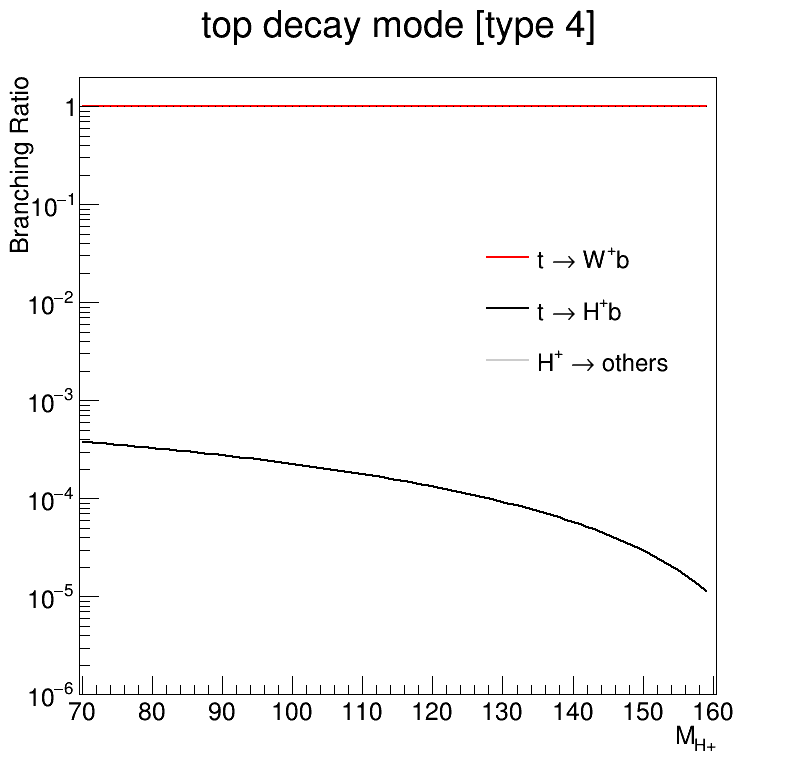

In [86]:
graphs_wb.SetTitle(f"top decay mode [type {type}]")
graphs_wb.GetXaxis().SetRangeUser(70, 160.)
graphs_wb.GetXaxis().SetTitle("M_{H+}")

graphs_wb.GetYaxis().SetRangeUser(1e-6, 2.)
graphs_wb.GetYaxis().SetTitle("Branching Ratio")
graphs_wb.GetYaxis().SetTitleOffset(1.3)

graphs_wb.SetLineColor(ROOT.kRed); graphs_wb.SetLineWidth(2)
graphs_hb.SetLineColor(ROOT.kBlack); graphs_hb.SetLineWidth(2)
graphs_others.SetLineColor(ROOT.kGray); graphs_others.SetLineWidth(2)

lg = ROOT.TLegend(0.6, 0.5, 0.9, 0.7)
lg.SetFillStyle(0)
lg.SetBorderSize(0)
lg.AddEntry(graphs_wb, "t #rightarrow W^{+}b", "l")
lg.AddEntry(graphs_hb, "t #rightarrow H^{+}b", "l")
lg.AddEntry(graphs_others, "H^{+} #rightarrow others", "l")

c = ROOT.TCanvas("c", "", 800, 800)
c.cd()
c.SetLogy()
graphs_wb.Draw()
graphs_hb.Draw("same")
graphs_others.Draw("same")
lg.Draw("same")
c.RedrawAxis()
c.Draw()

c.SaveAs(f"plots/type{type}/tanb{tanb}.topdecay.png")

In [248]:
# change MA and see how A -> mumu branching ratio changes
mAarr = np.arange(15, mHc-4)
graphs_bb = ROOT.TGraph()
graphs_cc = ROOT.TGraph()
graphs_ss = ROOT.TGraph()
graphs_gg = ROOT.TGraph()
graphs_tautau = ROOT.TGraph()
graphs_mumu = ROOT.TGraph()
graphs_others = ROOT.TGraph()

for mA in mAarr:
    d = pyslha.read(f"output.tanb{tanb}.{mHc}.{mA}.lha")
    A = d.decays[36]
    br_others = 0.
    for decay in A.decays:
        if decay.ids == [5, -5]:
            graphs_bb.AddPoint(mA, decay.br)
        elif decay.ids == [4, -4]:
            graphs_cc.AddPoint(mA, decay.br)
        #elif decay.ids == [3, -3]:
        #    graphs_ss.AddPoint(mA, decay.br)
        elif decay.ids == [21, 21]:
            graphs_gg.AddPoint(mA, decay.br)
        elif decay.ids == [15, -15]:
            graphs_tautau.AddPoint(mA, decay.br)
        elif decay.ids == [13, -13]:
            graphs_mumu.AddPoint(mA, decay.br)
        else:
            br_others += decay.br
    graphs_others.AddPoint(mA, br_others)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/tanb50.mHc160.Adecay.png has been created


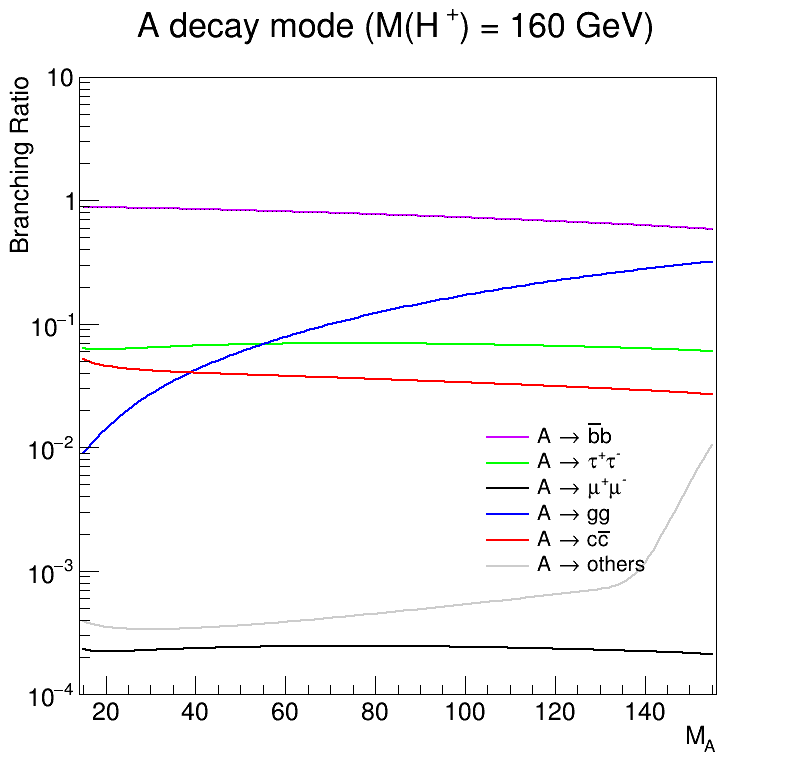

In [249]:
graphs_bb.SetTitle("A decay mode (M(H^{+}) = "+f"{mHc} GeV)")
graphs_bb.GetXaxis().SetRangeUser(15., mHc-5.)
graphs_bb.GetXaxis().SetTitle("M_{A}")

graphs_bb.GetYaxis().SetRangeUser(1e-4, 10)
graphs_bb.GetYaxis().SetTitle("Branching Ratio")
graphs_bb.GetYaxis().SetTitleOffset(1.3)

graphs_bb.SetLineColor(ROOT.kViolet); graphs_bb.SetLineWidth(2)
graphs_tautau.SetLineColor(ROOT.kGreen); graphs_tautau.SetLineWidth(2)
graphs_mumu.SetLineColor(ROOT.kBlack); graphs_mumu.SetLineWidth(2)
graphs_gg.SetLineColor(ROOT.kBlue); graphs_gg.SetLineWidth(2)
graphs_cc.SetLineColor(ROOT.kRed); graphs_cc.SetLineWidth(2)
graphs_others.SetLineColor(ROOT.kGray); graphs_others.SetLineWidth(2)

lg = ROOT.TLegend(0.6, 0.25, 0.9, 0.45)
lg.SetFillStyle(0)
lg.SetBorderSize(0)
lg.AddEntry(graphs_bb, "A #rightarrow #bar{b}b", "l")
lg.AddEntry(graphs_tautau, "A #rightarrow #tau^{+}#tau^{-}", "l")
lg.AddEntry(graphs_mumu, "A #rightarrow #mu^{+}#mu^{-}", "l")
lg.AddEntry(graphs_gg, "A #rightarrow gg", "l")
lg.AddEntry(graphs_cc, "A #rightarrow c#bar{c}", "l")
lg.AddEntry(graphs_others, "A #rightarrow others", "l")

c = ROOT.TCanvas("c", f"MHc {mHc} GeV", 800, 800)
c.cd()
c.SetLogy()
graphs_bb.Draw()
graphs_tautau.Draw("same")
graphs_mumu.Draw("same")
graphs_gg.Draw("same")
graphs_cc.Draw("same")
graphs_others.Draw("same")
lg.Draw("same")
c.RedrawAxis()
c.Draw()
c.SaveAs(f"plots/tanb{tanb}.mHc{mHc}.Adecay.png")